In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
df_transmitter = pd.read_csv('C:/Users/neurogears/source/repos/lsl/Workflows/transmitted.csv', names=['lsl-local', 'bonsai-ts', 'harp-ts'], header=0)
df_receiver = pd.read_csv('C:/Users/neurogears/source/repos/lsl/Workflows/received.csv', names=['lsl-ts', 'lsl-bonsai-ts', 'harp-lsl'])

print(df_transmitter)
print(df_receiver)

         lsl-local           bonsai-ts      harp-ts
0     1.133580e+06  637934043865741440  3186.651488
1     1.133580e+06  637934043866742016  3186.752128
2     1.133580e+06  637934043870861440  3187.163360
3     1.133580e+06  637934043872104448  3187.288128
4     1.133581e+06  637934043874262784  3187.503776
...            ...                 ...          ...
1347  1.133795e+06  637934046022563712  3402.313312
1348  1.133796e+06  637934046025373312  3402.593760
1349  1.133796e+06  637934046026822784  3402.739168
1350  1.133796e+06  637934046027723008  3402.828896
1351  1.133796e+06  637934046028644352  3402.920512

[1352 rows x 3 columns]
            lsl-ts       lsl-bonsai-ts     harp-lsl
0     1.133580e+06  637934043872157824  3186.651488
1     1.133580e+06  637934043872158080  3186.752128
2     1.133580e+06  637934043872158208  3187.163360
3     1.133580e+06  637934043872158208  3187.288128
4     1.133581e+06  637934043874263424  3187.503776
...            ...                 ... 

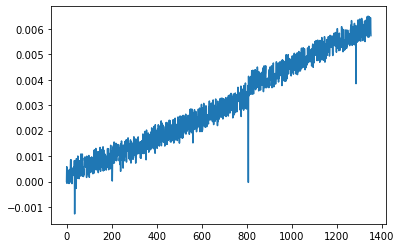

In [3]:
# are the harp and lsl clocks drifting relative to each other?
df_results = pd.DataFrame()
df_results['lsl_vs_harp'] = (df_transmitter['harp-ts'] - df_transmitter['harp-ts'][0]) - (df_transmitter['lsl-local'] - df_transmitter['lsl-local'][0])
plt.plot(df_results['lsl_vs_harp'])

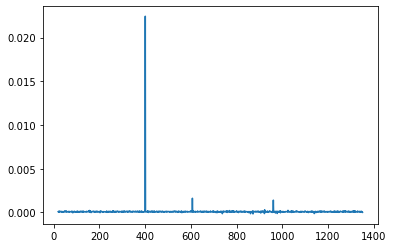

In [4]:
# differences on event timestamps (Bonsai timestamp for transmitter and receiver)
df_results['bonsai-ts-diff'] = (df_receiver['lsl-bonsai-ts'] - df_transmitter['bonsai-ts'])[20:] / 10000000
plt.plot(df_results['bonsai-ts-diff'])

Text(0, 0.5, 'delay (ms)')

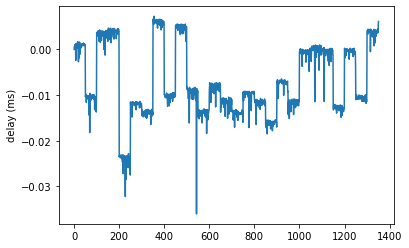

In [5]:
harp_ts = df_transmitter['harp-ts']
lsl_transmitter_ts = df_transmitter['lsl-local']
drift_correction = (harp_ts - harp_ts[0]) - (lsl_transmitter_ts - lsl_transmitter_ts[0])
corrected_harp_ts = harp_ts - drift_correction
receiver_corrected_lsl_ts = df_receiver['lsl-ts']

plt.plot(((receiver_corrected_lsl_ts - receiver_corrected_lsl_ts[0]) - (corrected_harp_ts - corrected_harp_ts[0])) * 1000)
plt.ylabel('delay (ms)')